In [39]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import sklearn.datasets as datasets

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
sns.set_context('poster')

import numpy as np

import sys
import os
sys.path.append(os.environ["SANDBOX"]) # SANDBOX should be the path of the dimension_reduction repo

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import src.visualization.plotting as plotting
import src.quality_measures as qm

In [42]:
sns.set(style='white', rc={'figure.figsize':(12,8)})

### Dimension Reduction Analysis

#### Goal

Effectively assess dimension reduction quality, and make it easy for others to do so as well. 

The desired punch line: here are the best ways to assess quality of your dimension reduction based on what you want your dimension reduction to preserve (paper), and here's how to easily check yourself on your own data (codebase). This should all come in a single handy framework with an easy to use API. 

#### Tasks

* Review and reproduce results existing quality measures. Create a cohesive easy to use interface along the way for comparing high vs. low space using whatever quality measure you'd like. 
    * ***Datasets:***
        * Synthetic
        * Natural (aka. real world)
            * MNIST
            * F-MNIST
            * COIL-20
    * ***Dimension Reduction Techniques:*** Preference to techniques that are implemented in sklearn and other standard python libraries or that are otherwise widely used.
        * PCA
        * MDS
        * Isomap
        * t-SNE
        * autoencoder
        * UMAP
        * Maybe others: (try them and then see if they add anything to the overall review)
    * ***Quality measures:***
        * Stress, strain
        * Trustworthiness
        * Continuity
        * Generalization errors of 1-NN classifiers?
        * Quality score from coranking matrix
* Include visualization options (when reducing to 2/3 dimensional space)   
* Do the same analysis adding our local neighbourhood scores
* Make
        

#### References

* [***MPH2009***](https://www.tilburguniversity.edu/upload/59afb3b8-21a5-4c78-8eb3-6510597382db_TR2009005.pdf): 2009 review of 12 dimension reduction techniques on 10 datasets (5 synthetic, 5 natural) using trustworthiness, continuity, and generalization errors of 1-NN classifiers. Techniques used were  
    * Kernel PCA, 
    * Isomap
    * Maximum Variance Unfolding
    * diffusion maps
    * Locally Linear Embedding
    * Laplacian Eigenmaps
    * Hessian LLE
    * Local Tangent Space Analysis
    * Sammon mapping
    * multilayer autoencoders
    * Locally Linear Coordination
    * manifold charting.
* [***S2015***](http://journals.sagepub.com/doi/pdf/10.1177/1473871613504102): 2015 comparison  of DR techniques on financial data using metric MDS, Sammon’s mapping, and the SOM. "Rather than being the most recent methods, the rationale for comparing these methods is to capture the suitability of well-known dimension reduction methods with inherently different aims: global and local distance preservation and topology preservation. For DDR, we test serial and parallel combinations of the projections with three data reduction or compression methods: vector quantization (VQ),16 k-means clustering,17 and Ward’s18 hierarchical clustering."
* [***LOV2015***](https://www.sciencedirect.com/science/article/pii/S0925231215003641) Use of the follow on from the quality assessment from the co-ranking metric with an algorithm that is better via that score.
* [***LV2008***](http://proceedings.mlr.press/v4/lee08a/lee08a.pdf): Trustworthiness, continuity and the coranking matrix.

#### Bibtex

    @article{MPH2009,
      title={Dimensionality reduction: a comparative review},
      author={Van Der Maaten, Laurens and Postma, Eric and Van den Herik, Jaap},
      journal={J Mach Learn Res},
      volume={10},
      pages={66--71},
      year={2009}
    } 
    
    @article{S2015,
      title={Data and dimension reduction for visual financial performance analysis},
      author={Sarlin, Peter},
      journal={Information Visualization},
      volume={14},
      number={2},
      pages={148--167},
      year={2015},
      publisher={Sage Publications Sage UK: London, England}
    }
    
    @article{LOV2015,
      title={Multi-scale similarities in stochastic neighbour embedding: Reducing dimensionality while preserving both local and global structure},
      author={Lee, John A and Peluffo-Ord{\'o}{\~n}ez, Diego H and Verleysen, Michel},
      journal={Neurocomputing},
      volume={169},
      pages={246--261},
      year={2015},
      publisher={Elsevier}
    }
    
    @inproceedings{LV2008,
      title={Quality assessment of nonlinear dimensionality reduction based on K-ary neighborhoods},
      author={Lee, John and Verleysen, Michel},
      booktitle={New Challenges for Feature Selection in Data Mining and Knowledge Discovery},
      pages={21--35},
      year={2008}
    }

### Use PCA on MNIST to get high/low data for first example

high data = original data

low data = after dimension reduction

In [43]:
digits = datasets.load_digits()

In [44]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [45]:
digits.data.shape

(1797, 64)

In [46]:
len(digits.target)

1797

In [47]:
high_data = digits.data

In [48]:
high_labels = digits.target

In [49]:
high_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [50]:
pca = PCA(n_components=2, svd_solver='arpack')

In [51]:
low_data = pca.fit_transform(high_data)

In [52]:
low_labels = high_labels

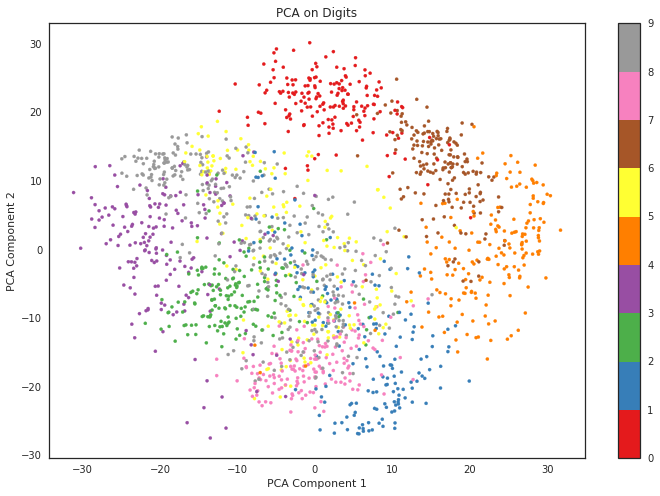

In [53]:
plotting.two_dim_label_viz(low_data, low_labels, cmap="Set1", s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA on Digits");

### Quality score using stress
Let's see how well PCA fared using a variety of Quality measures

First, use **stress** as defined as in the Metric MDS variant

$$ Stress_{D}(x_{1},x_{2},...,x_{N})={\Biggl (}\sum _{i\neq j=1,...,N}{\bigl (}d_{ij}-\|x_{i}-x_{j}\|{\bigr )}^{2}{\Biggr )}^{1/2}$$

Here $D = (d_{ij})$ is the pariwise distance matrix in the high space, and $x_1, \ldots, x_N$ are the points in the low space. 

In [54]:
high_distances, pca_low_distances, difference_distances = qm.pairwise_distances(high_data=high_data,
                                                                                low_data=low_data,
                                                                                metric='euclidean')

Relative local contributions could be computed via row sums of the differences between the distances...or the sqrt of the row sums of the squared difference of the distances.

For now we've settled on:
$$ PointStress_{D}(x_{k})= \sum _{k\neq j=1,...,N}{\bigl (}d_{kj}-\|x_{k}-x_{j}\|{\bigr )}^{2}$$

In [55]:
pca_point_stress = qm.point_stress(high_distances=high_distances, low_distances=pca_low_distances)
pca_stress = qm.stress(high_distances=high_distances, low_distances=pca_low_distances)
min(pca_point_stress), max(pca_point_stress)

(471434.2586618318, 3213718.9771714592)

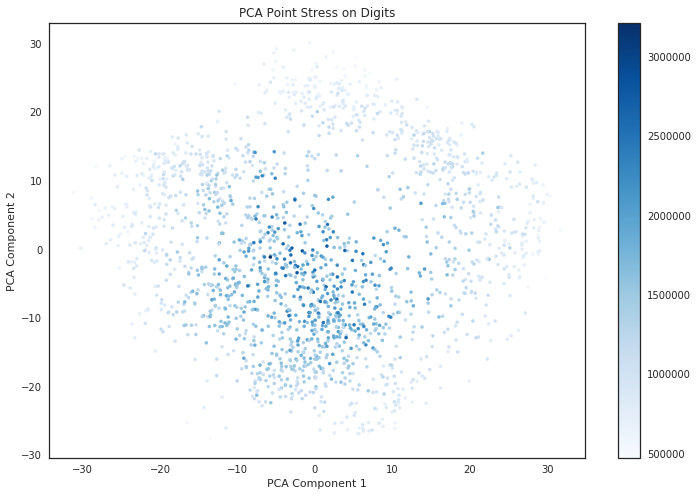

In [56]:
plotting.two_dim_label_viz(low_data, pca_point_stress, s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Point Stress on Digits");

## Metric MDS and digits

Let's try Metric MDS instead of PCA. This is the algorithm that optimizes stress as defined above.

In [57]:
mds = MDS(n_components=2, metric=True)

This usually takes...2 mins...

In [58]:
%%time
mds_low_data = mds.fit_transform(high_data)

CPU times: user 2min 22s, sys: 3min 34s, total: 5min 56s
Wall time: 1min 34s


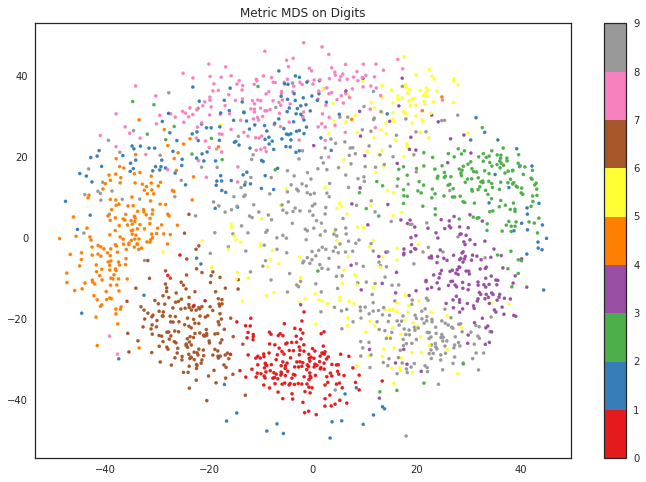

In [59]:
plotting.two_dim_label_viz(mds_low_data, low_labels, cmap="Set1", s=10)
plt.title("Metric MDS on Digits");

Also checking the that the hand-rolled stress function is comparable to the one implemented in Metric MDS. 

In [60]:
mds.stress_

418064093.8896415

In [61]:
_, mds_low_distances, _ = qm.pairwise_distances(high_distances=high_distances,
                                                low_data=mds_low_data,
                                                 metric='euclidean')

In [62]:
hand_rolled_stress = qm.stress(high_distances=high_distances, low_data=mds_low_data, metric='euclidean')
hand_rolled_stress

28914.5912813001

Looks close to a square-root

In [63]:
(hand_rolled_stress)**2 / mds.stress_

1.9998215612970893

hmmm...off by a multiple of 2...curious.

So sklearn seems to be implementing stress in metric MDS as $$ SKStress_{D}(x_{1},x_{2},...,x_{N})=\frac{1}{2}\sum _{i\neq j=1,...,N}{\bigl (}d_{ij}-\|x_{i}-x_{j}\|{\bigr )}^{2}$$

Now let's visualize the contribution to stress given by each point.

In [64]:
mds_stress = hand_rolled_stress
mds_point_stress = qm.point_stress(high_distances=high_distances, low_data=mds_low_data, metric='euclidean')
min(mds_point_stress), max(mds_point_stress)

(253500.01531424752, 1049293.9442717768)

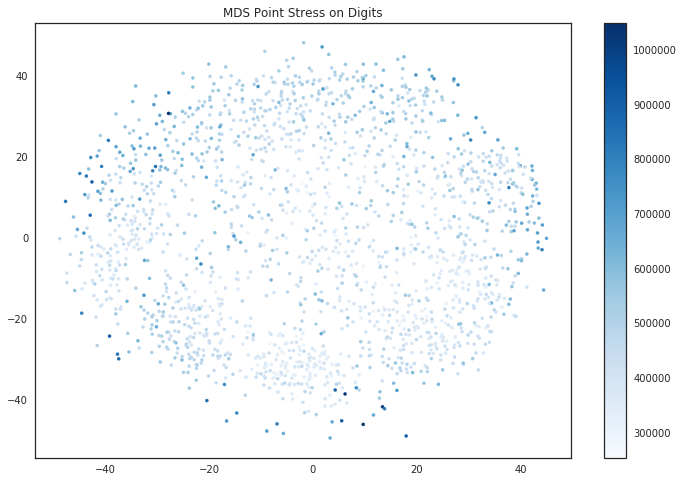

In [65]:
plotting.two_dim_label_viz(mds_low_data, mds_point_stress, s=10)
plt.title("MDS Point Stress on Digits");

### Strain from Classical MDS
Strain is the name given to stress that is optimized in classical MDS. The optimal solution is given by PCA.

$$\textstyle Strain_{D}(x_{1},x_{2},...,x_{N})={\Biggl (}{\frac {\sum _{i,j}{\bigl (}b_{ij}-\langle x_{i},x_{j}\rangle {\bigr )}^{2}}{\sum _{i,j}b_{ij}^{2}}}{\Biggr )}^{1/2}$$

where $B = -\frac{1}{2} J D^{(2)}J$ and $J = I_{N}-{\tfrac  {1}{N}}{\mathbf  {1}}{\mathbf  {1}}^{\top }$ where $\mathbf  {1}$ is the $N$-dimensional vector of 1's. 

In [66]:
N = len(high_data); N

1797

In [67]:
def centering_matrix(N):
    '''
    Returns the N x N centering matrix.
    '''
    I_N = np.identity(N)
    one_N = np.matrix(np.ones(N)).transpose()
    J = I_N - one_N * one_N.transpose()/N
    return J

def doubly_center_matrix(matrix):
    '''
    Doubly center the matrix. That is, -J * matrix * J.
    
    Note that this matrix must be square. 
    '''
    m, n = matrix.shape
    assert m == n, "Matrix must be square"
    J = centering_matrix(m)
    new_matrix = -J * matrix * J
    return new_matrix / 2

In [68]:
high_distances.shape

(1797, 1797)

In [69]:
B = doubly_center_matrix(qm.square_matrix_entries(high_distances))
top = qm.square_matrix_entries(B - qm.square_matrix_entries(pca_low_distances))
result = np.sqrt(np.sum(top)/np.sum(qm.square_matrix_entries(B)))

In [70]:
result

3.2373060963440676

In [71]:
local_contributions = np.sum(np.array(top), axis=1) / np.sum(qm.square_matrix_entries(B), axis=1)

In [77]:
def strain(high_distances, low_distances):
    B = doubly_center_matrix(qm.square_matrix_entries(high_distances))
    top = (B - qm.square_matrix_entries(low_distances))
    result = np.sqrt(np.sum(top)/np.sum(qm.square_matrix_entries(B)))
    return result

def point_strain(high_distances, low_distances):
    B = doubly_center_matrix(qm.square_matrix_entries(high_distances))
    top = (B - qm.square_matrix_entries(low_distances))
    result = np.sqrt(np.sum(top, axis=1)/np.sum(qm.square_matrix_entries(B), axis=1))
    return result

In [78]:
high_distances

array([[ 0.        , 59.55669568, 54.12947441, ..., 50.37856687,
        37.06750599, 47.03190407],
       [59.55669568,  0.        , 41.62931659, ..., 38.58756276,
        48.56953778, 50.32891813],
       [54.12947441, 41.62931659,  0.        , ..., 38.34057903,
        50.7740091 , 43.95452195],
       ...,
       [50.37856687, 38.58756276, 38.34057903, ...,  0.        ,
        44.15880433, 28.87905816],
       [37.06750599, 48.56953778, 50.7740091 , ..., 44.15880433,
         0.        , 39.42080669],
       [47.03190407, 50.32891813, 43.95452195, ..., 28.87905816,
        39.42080669,  0.        ]])

In [79]:
pca_strain = strain(high_distances, pca_low_distances); pca_strain

/opt/software/anaconda3/envs/dimension_reduction/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


nan

In [80]:
pca_point_strain = point_strain(high_distances, pca_low_distances)
min(pca_point_strain), max(pca_point_strain)

/opt/software/anaconda3/envs/dimension_reduction/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt
/opt/software/anaconda3/envs/dimension_reduction/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
plotting.two_dim_label_viz(low_data, pca_point_strain, vmin=2, vmax=14)

In [ ]:
mds_strain = strain(high_distances, mds_low_distances); mds_strain

In [ ]:
mds_point_strain = point_strain(high_distances, mds_low_distances)
min(mds_point_strain), max(mds_point_strain)

In [ ]:
plotting.two_dim_label_viz(mds_low_data, mds_point_strain, vmin=2, vmax=14)

In [ ]:
## Hmmmm...now I want these to be on the same color bars

In [ ]:
data = [low_data, mds_low_data]
labels = [pca_point_stress, mds_point_stress]
titles = ['PCA', 'Metric MDS']

In [ ]:
nrows = 1
ncols = 2
s = 15
cmap = "Blues"

fig = plt.figure(figsize=(14, 10))

grid = AxesGrid(fig, 111,
                nrows_ncols=(nrows, ncols),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for i, ax in enumerate(grid):
    ax.set_axis_off()
    im = ax.scatter(data[i][:,0], data[i][:,1], c=labels[i], cmap=cmap, s=s)
    ax.set_title(titles[i])
    #im = ax.imshow(np.random.random((16,16)), vmin=0, vmax=1)

# when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

cbar = ax.cax.colorbar(im)
cbar = grid.cbar_axes[0].colorbar(im)

#cbar.ax.set_yticks(np.arange(0, 1.1, 0.5))
#cbar.ax.set_yticklabels(['low', 'medium', 'high'])
plt.title("Point Stress")
plt.show()

In [ ]:
def two_dim_multiplot(data, labels, titles, cmap="Blues", s=15, **kwargs):
    ncols = 2
    nrows = int(len(data)/ncols)
    
    fig = plt.figure(figsize=(14*nrows, 5*ncols))

    grid = AxesGrid(fig, 111,
                    nrows_ncols=(nrows, ncols),
                    axes_pad=0.05,
                    cbar_mode='single',
                    cbar_location='right',
                    cbar_pad=0.1
                    )
    
    cbar_min, cbar_max = min(labels[0]), max(labels[0])
    
    for label in labels:
        cbar_min = min(cbar_min, min(label))
        cbar_max = min(cbar_max, min(label))

        
    for i, ax in enumerate(grid):
        ax.set_axis_off()
        im = ax.scatter(data[i][:,0], data[i][:,1], c=labels[i], cmap=cmap, s=s)
        ax.set_title(titles[i])

    # when cbar_mode is 'single', for ax in grid, ax.cax = grid.cbar_axes[0]

    cbar = ax.cax.colorbar(im)
    cbar = grid.cbar_axes[0].colorbar(im);


## Comparisons 

In [ ]:
data = [low_data, mds_low_data]
labels = [low_labels, low_labels]
titles = ['PCA', 'Metric MDS']

two_dim_multiplot(data, labels, titles, cmap="Set1")

### Stress (Metric MDS)

In [ ]:
data = [low_data, mds_low_data]
labels = [pca_point_stress, mds_point_stress]
titles = [f'PCA\n Stress: {int(pca_stress)}', f'MDS\n Stress: {int(mds_stress)}']

two_dim_multiplot(data, labels, titles)
plt.suptitle("Stress Pointwise Contribution");

### Strain (Classical MDS/PCA)

In [ ]:
width = 4
precision = 4
data = [low_data, mds_low_data]
labels = [pca_point_strain, mds_point_strain]
titles = [f'PCA\n Strain: {pca_strain:{width}.{precision}}', f'MDS\n Strain: {mds_strain:{width}.{precision}}']

two_dim_multiplot(data, labels, titles)
plt.suptitle("Strain Pointwise Contribution");